In [4]:
from datamatrix import io ## manipuler données temporelles

data = io.readtxt(".\\DONNEES\\eurostat-gdp.csv")
print(data)

+----+---------+------+------+
| #  | country | gdp  | year |
+----+---------+------+------+
| 0  |    AL   | 1700 | 2000 |
| 1  |    AL   | 1850 | 2001 |
| 2  |    AL   | 1940 | 2002 |
| 3  |    AL   | 2060 | 2003 |
| 4  |    AL   | 2180 | 2004 |
| 5  |    AL   | 2310 | 2005 |
| 6  |    AL   | 2460 | 2006 |
| 7  |    AL   | 2630 | 2007 |
| 8  |    AL   | 2850 | 2008 |
| 9  |    AL   | 2960 | 2009 |
| 10 |    AL   | 3090 | 2010 |
| 11 |    AL   | 3180 | 2011 |
| 12 |    AL   | 3230 | 2012 |
| 13 |    AL   | 3260 | 2013 |
| 14 |    AL   | 3330 | 2014 |
| 15 |    AL   | 3410 | 2015 |
| 16 |    AL   | 3530 | 2016 |
| 17 |    AL   | 3670 | 2017 |
| 18 |    AL   | 3830 | 2018 |
| 19 |    AL   | 3920 | 2019 |
+----+---------+------+------+
(+ 758 rows not shown)


In [6]:
## vérifier qu'il n'existe pas de valeurs aberrantes :
print(data.gdp != int) ## RO en 2000 et 2001

+-----+---------+-----+------+
|  #  | country | gdp | year |
+-----+---------+-----+------+
| 627 |    RO   |     | 2000 |
| 628 |    RO   |     | 2001 |
+-----+---------+-----+------+


In [8]:
## on a deux string
## ce qui va poser problème dans l'analyse plus tard
## on transforme les châines vides en nan :

from datamatrix import NAN
data.gdp[ data.gdp != int ] = NAN ## on assigne NAN

## puis on vérifie 
print(data.gdp != int)

+-----+---------+-----+------+
|  #  | country | gdp | year |
+-----+---------+-----+------+
| 627 |    RO   | nan | 2000 |
| 628 |    RO   | nan | 2001 |
+-----+---------+-----+------+


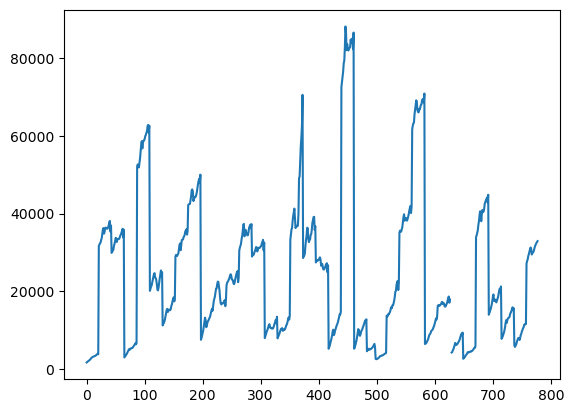

In [9]:
## Afficher un graphique
## A noter que ce graphique n'a pas de sens puisqu'il ne distingue pas les pays :

import matplotlib.pyplot as plt

plt.plot(data.gdp)
plt.show()

In [10]:
## cependant, la structure de donnée ne permet de faire une analyse convenable
## on va donc restructurer de nos données, de sortes à avoir un pays par ligne et pour chaque pays
##+ sur gdp par année en colonne. On a alors :

from datamatrix import operations

grp = operations.group(data, by=data.country)
print(grp)

+----+---------+-----------------------------------+-------------------------------+
| #  | country |                gdp                |              year             |
+----+---------+-----------------------------------+-------------------------------+
| 0  |    CY   | [20130. 20700. ... 23840. 24920.] | [2000. 2001. ... 2020. 2021.] |
| 1  |    NL   | [35060. 35610. ... 40130. 41860.] | [2000. 2001. ... 2020. 2021.] |
| 2  |    SE   | [33960. 34360. ... 42910. 44840.] | [2000. 2001. ... 2020. 2021.] |
| 3  |    HR   | [ 7970.  8510. ... 11730. 13460.] | [2000. 2001. ... 2020. 2021.] |
| 4  |    DE   | [28910. 29370. ... 34590. 35480.] | [2000. 2001. ... 2020. 2021.] |
| 5  |    IT   | [27430. 27950. ... 24900. 26700.] | [2000. 2001. ... 2020. 2021.] |
| 6  |    RS   |   [2650. 2840. ... 5440. 5890.]   | [2000. 2001. ... 2020. 2021.] |
| 7  |    TR   | [ 6130.  5700. ... 11600.    nan] | [2000. 2001. ... 2020.   nan] |
| 8  |    AT   | [31710. 31990. ... 35390. 36920.] | [2000. 2001.

c:\Users\will\Anaconda3\envs\statistics\lib\site-packages\datamatrix\_datamatrix\_numericcolumn.py:339: UserWarning: Changing dtype to int64
  warnings.warn(u'Changing dtype to int64')


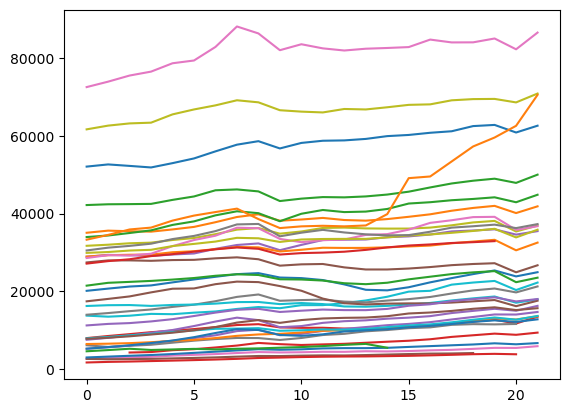

In [14]:
plt.plot(grp.gdp.plottable)
plt.show()

In [18]:
## Traiter les données manquantes
## précédemment, nous avons passé les valeurs non connues en NAN
## Nous allons là identifier les lignes avec des valeurs manquantes :

print(grp.year[:, 0]) ## un 2006 traîne

print(grp.year[:, 0] != 2000) ## affiche toutes les lignes où year != 2000





col[2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2006. 2000. 2000. 2000.]
+----+---------+-------------------------------+-------------------------------+
| #  | country |              gdp              |              year             |
+----+---------+-------------------------------+-------------------------------+
| 32 |    ME   | [4580. 4890. ...   nan   nan] | [2006. 2007. ...   nan   nan] |
+----+---------+-------------------------------+-------------------------------+


In [19]:
from datamatrix import series as srs

shift = grp.year[:, 0] - 2000
print(shift)
grp.year = srs.roll(grp.year, shift)
grp.gdp = srs.roll(grp.gdp, shift)
print(grp)

col[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0.]
+----+---------+-----------------------------------+-------------------------------+
| #  | country |                gdp                |              year             |
+----+---------+-----------------------------------+-------------------------------+
| 0  |    CY   | [20130. 20700. ... 23840. 24920.] | [2000. 2001. ... 2020. 2021.] |
| 1  |    NL   | [35060. 35610. ... 40130. 41860.] | [2000. 2001. ... 2020. 2021.] |
| 2  |    SE   | [33960. 34360. ... 42910. 44840.] | [2000. 2001. ... 2020. 2021.] |
| 3  |    HR   | [ 7970.  8510. ... 11730. 13460.] | [2000. 2001. ... 2020. 2021.] |
| 4  |    DE   | [28910. 29370. ... 34590. 35480.] | [2000. 2001. ... 2020. 2021.] |
| 5  |    IT   | [27430. 27950. ... 24900. 26700.] | [2000. 2001. ... 2020. 2021.] |
| 6  |    RS   |   [2650. 2840. ... 5440. 5890.]   | [2000. 2001. ... 2020. 2021.] |
| 7  |    TR   | [ 6130.  5700. ... 